In [2]:
from minisom import MiniSom
import pandas as pd 
import numpy as np

data = pd.read_csv("./QCM Sensor Alcohol Dataset/QCM3.csv", sep = ';')

In [3]:
data.shape

(125, 15)

In [4]:
data.dtypes

0.799_0.201      float64
0.799_0.201.1    float64
0.700_0.300      float64
0.700_0.300.1    float64
0.600_0.400      float64
0.600_0.400.1    float64
0.501_0.499      float64
0.501_0.499.1    float64
0.400_0.600      float64
0.400_0.600.1    float64
1-Octanol          int64
1-Propanol         int64
2-Butanol          int64
2-propanol         int64
1-isobutanol       int64
dtype: object

In [5]:
data.head()

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1,1-Octanol,1-Propanol,2-Butanol,2-propanol,1-isobutanol
0,-10.06,-10.62,-14.43,-18.31,-24.64,-30.56,-38.62,-45.59,-54.89,-62.28,1,0,0,0,0
1,-9.69,-10.86,-16.73,-21.75,-28.47,-35.83,-43.65,-52.43,-61.92,-71.27,1,0,0,0,0
2,-12.07,-14.28,-21.54,-27.92,-35.19,-43.94,-52.04,-62.49,-71.97,-83.10,1,0,0,0,0
3,-14.21,-17.41,-25.91,-33.36,-41.29,-51.27,-59.94,-71.55,-81.51,-93.83,1,0,0,0,0
4,-16.57,-20.35,-29.97,-37.84,-47.03,-57.29,-67.13,-78.96,-90.01,-102.65,1,0,0,0,0


In [6]:
attributes = data.drop(['1-Octanol', '1-Propanol', '2-Butanol', '2-propanol', '1-isobutanol'],axis = 1)
attributes.head()

,0.799_0.201,0.799_0.201.1,0.700_0.300,0.700_0.300.1,0.600_0.400,0.600_0.400.1,0.501_0.499,0.501_0.499.1,0.400_0.600,0.400_0.600.1
0,-10.06,-10.62,-14.43,-18.31,-24.64,-30.56,-38.62,-45.59,-54.89,-62.28
1,-9.69,-10.86,-16.73,-21.75,-28.47,-35.83,-43.65,-52.43,-61.92,-71.27
2,-12.07,-14.28,-21.54,-27.92,-35.19,-43.94,-52.04,-62.49,-71.97,-83.10
3,-14.21,-17.41,-25.91,-33.36,-41.29,-51.27,-59.94,-71.55,-81.51,-93.83
4,-16.57,-20.35,-29.97,-37.84,-47.03,-57.29,-67.13,-78.96,-90.01,-102.65


In [7]:
classes = data.drop(['0.799_0.201','0.799_0.201.1','0.700_0.300', '0.700_0.300.1', '0.600_0.400', '0.600_0.400.1', '0.501_0.499', '0.501_0.499.1', '0.400_0.600', '0.400_0.600.1'], axis=1)
classes1 = classes.idxmax(axis=1)

In [8]:
from sklearn import preprocessing
attributes = preprocessing.scale(attributes)

for i in range(125):
    length = sum(map(lambda x: float(x**2), attributes[i]))**0.5
    for j in range(len(attributes[i])):
        attributes[i][j] = attributes[i][j]/length
print(attributes)

[[ 0.34216833  0.36109808  0.34726827 ...  0.28281505  0.27014278
   0.25723677]
 [ 0.3597289   0.37413234  0.34972628 ...  0.27296413  0.26697117
   0.2463657 ]
 [ 0.37210891  0.37538937  0.35516816 ...  0.26392167  0.26963733
   0.23856559]
 ...
 [-0.13154362 -0.18448909 -0.15814754 ... -0.45796032 -0.31863304
  -0.54632096]
 [-0.14002285 -0.18909092 -0.17186353 ... -0.45358935 -0.31974806
  -0.53508379]
 [-0.14954317 -0.19080205 -0.17518444 ... -0.45354605 -0.32419243
  -0.53193752]]


In [9]:
for i in range(len(classes1)):
    if(classes1[i] == "1-Octanol"):
        classes1[i] = 0
    elif classes1[i] == "1-Propanol":
        classes1[i] = 1
    elif classes1[i] == "2-Butanol":
        classes1[i] = 2
    elif classes1[i] == "2=Propanol":
        classes1[i] = 3
    elif classes1[i] == "1-isobutanol":
        classes1[i] = 4

In [41]:
#16, 16 is the width and height of neurons. 
# sigma might be D 
som = MiniSom(12,12,10,sigma=1.5,learning_rate=0.5)
som.pca_weights_init(attributes)
som.train(attributes,1000,verbose=True)

 [  969 / 1000 ]  97% - 0:00:00 left 

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.059457080130939206


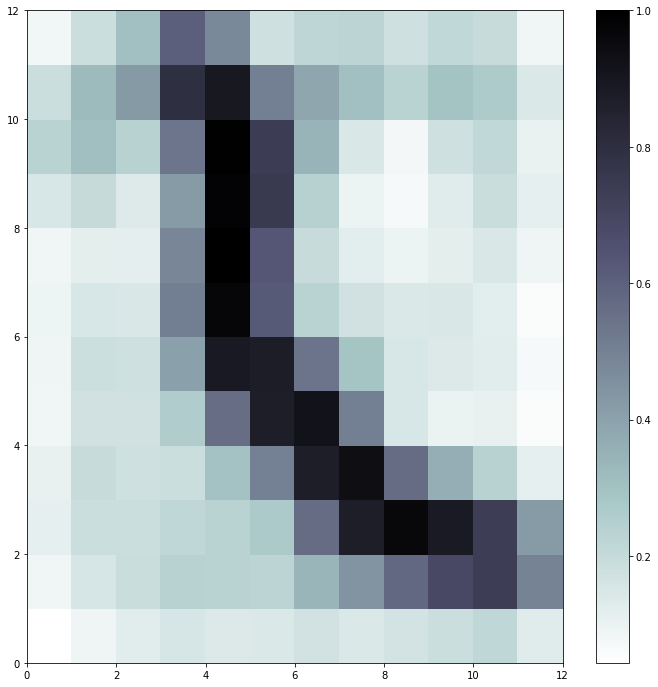

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()
plt.show()